# Transform data to symetric space: fs_LR (/conte69, den:32k) for Asymmetric GMs analysis
that is also the "standard space" from HCP, which provides commands to handle it
(I did not find a 'freesurfer_directory' that would enable mri_surf2surf as before...)

* use workbench commands (download folder and make executable by adding path (....linux_64) to `~/.zshrc`)
`https://www.humanconnectome.org/software/get-connectome-workbench` : 
wb_command -metric-resample
wb_command -surface-resample
wb_command -label-resample
* wb_view in terminal should work `ssh -X sciencecloud` (Enable X11 Forwarding Over SSH)

## B. FreeSurfer native individual data to fs_LR
https://neurostars.org/t/getting-fmriprep-outputs-into-fslr32k-space-viewing-issue/27052    --> nice code with variables!!

`https://wiki.humanconnectome.org/docs/assets/Resampling-FreeSurfer-HCP_5_8.pdf`

SUBJECTS_DIR="/mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-01/surf"
FUNC_DIR="/mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func"

### using the `conte69_32k_lh_sphere.gii` as provided in BrainSpace toolbox
1) for lh/rh
wb_shortcuts -freesurfer-resample-prep $SUBJECTS_DIR/lh.white $SUBJECTS_DIR/lh.pial $SUBJECTS_DIR/lh.sphere.reg /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii $SUBJECTS_DIR/lh.midthickness.surf.gii $SUBJECTS_DIR/sub-01.lh.midthickness.32k_fs_LR.surf.gii $SUBJECTS_DIR/lh.sphere.reg.surf.gii

2) To map “metric” (scalar) data, run "wb_command -metric-resample”: for lh/rh & all runs!
wb_command -metric-resample $FUNC_DIR/sub-01_ses-1_task-magjudge_run-1_space-fsnative_hemi-L_bold.func.gii $SUBJECTS_DIR/lh.sphere.reg.surf.gii /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii ADAP_BARY_AREA $FUNC_DIR/sub-01_ses-1_task-magjudge_run-1_space-32k-fsLR_hemi-L_bold.func.gii -area-surfs $SUBJECTS_DIR/lh.midthickness.surf.gii $SUBJECTS_DIR/sub-01.lh.midthickness.32k_fs_LR.surf.gii


### not sure if I have to do it with a `fs_LR-deformed_to-fsaverage.R.sphere.32k_fs_LR.surf.gii` file (e.g. HCPpipelines/global/templates/standard_mesh_atlases/resample_fsaverage/) as said in the instruction
--> try this now with mod.
$NEWSPHERE_L="/home/ubuntu/git/HCPpipelines/global/templates/standard_mesh_atlases/resample_fsaverage/fs_LR-deformed_to-fsaverage.R.sphere.32k_fs_LR.surf.gii"

1) wb_shortcuts -freesurfer-resample-prep $SUBJECTS_DIR/lh.white $SUBJECTS_DIR/lh.pial $SUBJECTS_DIR/lh.sphere.reg $NEWSPHERE_L $SUBJECTS_DIR/lh.midthickness_n.surf.gii $SUBJECTS_DIR/sub-01.lh.midthickness.32k_fs_LR_n.surf.gii $SUBJECTS_DIR/lh.sphere_n.reg.surf.gii 

2) wb_command -metric-resample $FUNC_DIR/sub-01_ses-1_task-magjudge_run-1_space-fsnative_hemi-L_bold.func.gii $SUBJECTS_DIR/lh.sphere_n.reg.surf.gii $NEWSPHERE_L ADAP_BARY_AREA $FUNC_DIR/sub-01_ses-1_task-magjudge_run-1_space-32k-fsLR_n_hemi-L_bold.func.gii -area-surfs $SUBJECTS_DIR/lh.midthickness_n.surf.gii $SUBJECTS_DIR/sub-01.lh.midthickness.32k_fs_LR_n.surf.gii


In [1]:
import nibabel as nib
import numpy as np
import os.path as op

bids_folder = '/mnt_03/ds-dnumrisk'

In [2]:
from nipype.interfaces.freesurfer import SurfaceTransform

def surfTosurf(sub,source_space, target_space,     # requires both space directories in bids_folder/derivatives/freesurfer !
                ses = 1, bids_folder='/Volumes/mrenkeED/data/ds-dnumrisk',task = 'magjudge'):
    runs = range(1,7)
    for run in runs:
        for hemi in ['L', 'R']:
            sxfm = SurfaceTransform(subjects_dir=op.join(bids_folder,'derivatives','freesurfer'))
            in_file = f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_space-{source_space}_hemi-{hemi}_bold.func.gii'
            in_file_path = op.join(bids_folder, 'derivatives', 'fmriprep', f'sub-{sub}',f'ses-{ses}','func',in_file)
            out_file = f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_space-{target_space}_hemi-{hemi}_bold.func.gii'
            out_file_path = op.join(bids_folder, 'derivatives', 'fmriprep', f'sub-{sub}',f'ses-{ses}','func',out_file)

            sxfm.inputs.source_file = in_file_path
            sxfm.inputs.out_file = out_file_path

            sxfm.inputs.source_subject = source_space if source_space != 'fsnative' else f'sub-{sub:02d}'
            sxfm.inputs.target_subject = target_space if target_space != 'fsnative' else f'sub-{sub:02d}'

            if hemi == 'L':
                sxfm.inputs.hemi = 'lh'
            elif hemi == 'R':
                sxfm.inputs.hemi = 'rh'

            r = sxfm.run()

<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_1974556/2675170076.py:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  sxfm.inputs.source_subject = source_space if source_space is not 'fsnative' else f'sub-{sub:02d}'
/tmp/ipykernel_1974556/2675170076.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  sxfm.inputs.target_subject = target_space if target_space is not 'fsnative' else f'sub-{sub:02d}'


In [35]:
# lets look if the outputfile makes sense!

fn = '/mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-32k-fsLR_hemi-L_bold.func.gii'
ts = nib.load(fn).agg_data()

fn = '/mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-32k-fsLR_n_hemi-L_bold.func.gii'# new version
ts_n = nib.load(fn).agg_data()
np.shape(ts)

(188, 32492)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
ts[0][:10]

array([886.0103 , 933.3819 , 809.0623 , 831.1013 , 829.4776 , 841.33777,
       829.38654, 995.488  ,   0.     , 857.57495], dtype=float32)

In [41]:
ts_n[0][:10]

array([783.5587 , 949.4587 , 875.8408 , 953.4522 , 896.078  , 854.34015,
       808.7464 , 739.654  , 919.5382 , 754.0082 ], dtype=float32)

(-49.77439880371094, 1045.2623748779297)

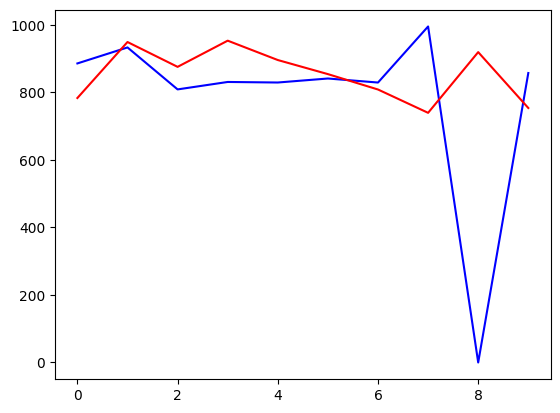

In [52]:
plt.plot(range(10),ts[0][:10],c='blue')
plt.plot(range(10),ts_n[0][:10],c='red')
plt.ylim()

In [32]:
sub = '01'
ses=1
space='32k-fsLR'# 'fsnative'#'
task='magjudge'
run = 1

timeseries = [None] * 2
for i, hemi in enumerate(['L', 'R']):
    filename = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', 
    f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_space-{space}_hemi-{hemi}_bold.func.gii')        
    if space == '32k-fsLR':
        timeseries[i] =np.transpose(np.array(nib.load(filename).agg_data()))
    else:
        timeseries[i] = nib.load(filename).agg_data()
timeseries = np.vstack(timeseries,) # (20484, 135)
np.shape(timeseries)

(64984, 188)

In [67]:
space='fsaverage'
hemi = 'L'
filename = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', 
    f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_space-{space}_hemi-{hemi}_bold.func.gii') 
np.shape(nib.load(filename).agg_data())

(163842, 188)

In [22]:
space='32k-fsLR'
filename = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', 
    f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_space-{space}_hemi-{hemi}_bold.func.gii') 
np.shape(nib.load(filename).agg_data())
#np.shape(np.transpose(nib.load(filename).agg_data().transpose()))

(188, 32492)

In [26]:
np.shape(np.transpose(np.array(nib.load(filename).agg_data())))

(32492, 188)

# Just apply Glasser parcelattion to fsaverage space data?!

.annot files from: 
https://figshare.com/articles/dataset/HCP-MMP1_0_projected_on_fsaverage/3498446?file=5528837

mris_convert --annot rh.HCPMMP1.annot /mnt_03/ds-dnumrisk/derivatives/freesurfer/fsaverage/surf/rh.white rh.HCPMMP1.gii

In [16]:
hemi = 'rh'
atlas_fn = f'/mnt_03/diverse_neuralData/atlases_parcellations/{hemi}.HCPMMP1.gii'
# np.shape(nib.load(atlas).agg_data()) = (163842,), yes, that is fsaverga5 dimensions!! :) 
#file = '/mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-fsaverage_hemi-L_bold.func.gii'
#np.shape(nib.load(file).agg_data())
atlas_ex = nib.load(atlas_fn).agg_data()

In [17]:
np.unique(atlas_ex)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

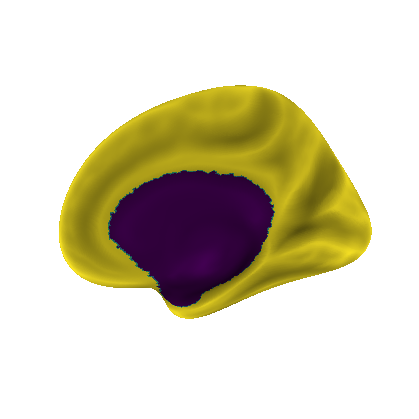

In [20]:
from  nilearn.datasets import fetch_surf_fsaverage
import nilearn.plotting as nplt
import matplotlib.pyplot as plt

fsaverage = fetch_surf_fsaverage('fsaverage') 

atlas_ex[atlas_ex != 0 ] = 1
nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= atlas_ex, # infl_right # pial_right
            view= 'lateral',cmap='viridis', colorbar=False, #title=f'sub-{sub}, grad {i}',
            bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7) #

plt.show()

In [10]:
# super, now use these parcellation atlas apply it to fsaverage.func.gii and derive GMs!! :) 
from brainspace.utils.parcellation import reduce_by_labels
from nilearn import datasets

atlas_d = datasets.fetch_atlas_surf_destrieux() # fsaverage5

In [30]:
from utils import cleanTS

ts = cleanTS('01',1,bids_folder=bids_folder, space = 'fsaverage')

/home/ubuntu/git/numrisk/numrisk/fmri_analysis/gradients/utils.py:111: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fmriprep_confounds= fmriprep_confounds.fillna(method='bfill')
/home/ubuntu/git/numrisk/numrisk/fmri_analysis/gradients/utils.py:111: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fmriprep_confounds= fmriprep_confounds.fillna(method='bfill')
/home/ubuntu/git/numrisk/numrisk/fmri_analysis/gradients/utils.py:111: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fmriprep_confounds= fmriprep_confounds.fillna(method='bfill')
/home/ubuntu/git/numrisk/numrisk/fmri_analysis/gradients/utils.py:111: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or o

In [31]:
atlas_left = nib.load(f'/mnt_03/diverse_neuralData/atlases_parcellations/lh.HCPMMP1.gii').agg_data()
atlas_right = nib.load(f'/mnt_03/diverse_neuralData/atlases_parcellations/rh.HCPMMP1.gii').agg_data()

labeling = np.concatenate([(atlas_left+1000), (atlas_right+2000)])
np.shape(labeling)



(327684,)

In [34]:
mask = ~np.isin(labeling, 0)
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [32]:
ts_masked = ts[labeling!= 0] # Remove non-cortex regions (where label=0)
seed_ts = reduce_by_labels(ts_masked, labeling[labeling!= 0], axis=1, red_op='mean',dtype=float)

In [22]:
np.shape(seed_ts)


(180, 1128)

In [35]:
def get_glasser_parcels(base_folder='/mnt_03/diverse_neuralData/atlases_parcellations'):
    atlas_left = nib.load(op.join(base_folder,'lh.HCPMMP1.gii')).agg_data()
    atlas_right =  nib.load(op.join(base_folder,'rh.HCPMMP1.gii')).agg_data()

    labeling = np.concatenate([(atlas_left+1000), (atlas_right+2000)]) # unique labels for left and right!
    mask = ~np.isin(labeling, 0) # non-cortex region (unknow and medial wall) have label 0
    return mask, labeling

In [36]:
mask, labeling_noParcel = get_glasser_parcels()

In [39]:
subject = 1
sub = f'{int(subject):02d}'
print(sub)

01


# Old did not work

In [7]:
import os.path as op
import nipype.interfaces.workbench as workbench

#from nipype.interfaces.workbench import SurfaceResample # does not work
bids_folder = '/mnt_03/ds-dnumrisk'


## paths

/home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_rh_sphere.gii

convert freesurfer FreeSurfer's native format files to *.gii that Workbench accepts:
`mris_convert lh.sphere lh.sphere.gii` (being in '/mnt_03/ds-dnumrisk/derivatives/freesurfer/fsaverage/surf')


In [19]:
import os
os.environ["PATH"] += os.pathsep + "/home/ubuntu/workbench/bin_linux64"

# in terminal: wb_command -surface-resample

In [17]:
# functional 
sub = 1
hemi = 'L'
hemi_ = 'lh'
source_folder = op.join(bids_folder,'derivatives','fmriprep', f'sub-{sub:02d}', 'ses-1','func')
source_file = op.join(source_folder, f'sub-{sub:02d}_ses-1_task-magjudge_run-1_space-fsaverage_hemi-{hemi}_bold.func.gii')
source_sphere = f'/mnt_03/ds-dnumrisk/derivatives/freesurfer/fsaverage/surf/{hemi_}.sphere.gii'

target_file = op.join(source_folder, f'sub-{sub:02d}_ses-1_task-magjudge_run-1_space-conte69_hemi-{hemi}_bold.func.gii')
target_sphere = f'/home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_{hemi_}_sphere.gii'

In [42]:
# anatomical

sub = 1
hemi = 'L'
hemi_ = 'lh'
source_folder = op.join(bids_folder,'derivatives','ips_masks', f'sub-{sub:02d}',)
source_file = op.join(source_folder, f'sub-{sub:02d}_desc-NPC_{hemi}_space-fsnative_hemi-{hemi_}.ips.gii')
source_sphere = f'/mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-{sub:02d}/surf/{hemi_}.sphere.gii'

target_file = op.join(source_folder,  f'sub-{sub:02d}_desc-NPC_{hemi}_space-conte69_hemi-{hemi_}.ips.gii')
target_sphere = f'/home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_{hemi_}_sphere.gii'

# /Users/mrenke/data/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-fsnative_hemi-lh.ips.gii

In [49]:
f"{source_file} {source_sphere} {target_sphere} {target_file}"

'/mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-fsnative_hemi-lh.ips.gii /mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-01/surf/lh.sphere.gii /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-conte69_hemi-lh.ips.gii'

In [30]:
from nipype.interfaces.base import CommandLine

# Custom command to resample surface with wb_command
class WorkbenchSurfaceResample(CommandLine):
    _cmd = "wb_command -surface-resample"
    input_spec = None  # Define custom input specs if needed

# Example usage:
resample = WorkbenchSurfaceResample()

resample.inputs.args = f"-method BARYCENTRIC {source_file} {source_sphere} {target_sphere} {target_file}"

resample.run()



Exception: No input_spec in class: WorkbenchSurfaceResample

In [44]:
from nipype.interfaces.base import CommandLine, CommandLineInputSpec, File, traits, TraitedSpec

# Define input specifications
class WorkbenchSurfaceResampleInputSpec(CommandLineInputSpec):
    in_file = File(exists=True, mandatory=True, desc="Input GIFTI functional file (.func.gii)")
    current_sphere = File(exists=True, mandatory=True, desc="Current sphere file (.gii)")
    new_sphere = File(exists=True, mandatory=True, desc="Target sphere file (.gii)")
    method = traits.Str("BARYCENTRIC", usedefault=True, desc="Resampling method, typically BARYCENTRIC")
    out_file = File("resampled_output.func.gii", usedefault=True, desc="Output resampled file")

# Define output specifications
class WorkbenchSurfaceResampleOutputSpec(TraitedSpec):
    out_file = File(exists=True, desc="Resampled output GIFTI functional file")

# Define the custom Workbench Surface Resample interface
class WorkbenchSurfaceResample(CommandLine):
    _cmd = "wb_command -surface-resample"
    input_spec = WorkbenchSurfaceResampleInputSpec
    output_spec = WorkbenchSurfaceResampleOutputSpec

    def _list_outputs(self):
        outputs = self._outputs().get()
        outputs["out_file"] = self.inputs.out_file
        return outputs

    def _format_arg(self, name, spec, value):
        # Build the command string by inserting arguments for wb_command
        if name == "in_file":
            return f"{value}"
        if name == "current_sphere":
            return f"{value}"
        if name == "new_sphere":
            return f"{value}"
        if name == "method":
            return f"-method {value}"
        if name == "out_file":
            return f"{value}"
        return super()._format_arg(name, spec, value)

    def _cmdline(self):
        # Create command with correct order and structure for wb_command
        return f"{self._cmd} {self.inputs.in_file} {self.inputs.current_sphere} {self.inputs.new_sphere} -method {self.inputs.method} {self.inputs.out_file}"


In [47]:
resample = WorkbenchSurfaceResample()
resample.inputs.in_file = source_file
resample.inputs.current_sphere = source_sphere
resample.inputs.new_sphere = target_sphere
resample.inputs.method = "BARYCENTRIC"
resample.inputs.out_file = target_file

# Run the command
resample.run()

241028-14:42:17,180 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:RESAMPLE A SURFACE TO A DIFFERENT MESH
241028-14:42:17,181 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:   wb_command -surface-resample
241028-14:42:17,182 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:      <surface-in> - the surface file to resample
241028-14:42:17,182 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:      <current-sphere> - a sphere surface with the mesh that the input surface
241028-14:42:17,182 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:         is currently on
241028-14:42:17,183 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:      <new-sphere> - a sphere surface that is in register with <current-sphere>
241028-14:42:17,183 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:         and has the desired output mesh
241028-14:42:17,183 nipype.interface INFO:
	 stdout 2024-10-28T14:42:17.180311:      <method> - the m

FileNotFoundError: No such file or directory '/mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-conte69_hemi-lh.ips.gii' for output 'out_file' of a WorkbenchSurfaceResample interface

In [48]:
print(resample.inputs)


args = <undefined>
current_sphere = /mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-01/surf/lh.sphere.gii
environ = {}
in_file = /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-fsnative_hemi-lh.ips.gii
method = BARYCENTRIC
new_sphere = /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii
out_file = /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-conte69_hemi-lh.ips.gii



wb_command -surface-resample /mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-fsaverage_hemi-L_bold.func.gii /mnt_03/ds-dnumrisk/derivatives/freesurfer/fsaverage/surf/lh.sphere.gii /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii sub-01/ses-1/func sub-01_ses-1_task-magjudge_run-1_space-conte69_hemi-L_bold.func.gii -method BARYCENTRIC /mnt_03/ds-dnumrisk/derivatives/fmriprep/


In [11]:
resample.inputs.args = (
    "-method BARYCENTRIC "
    source_file #"/path/to/input.func.gii "
    source_sphere #"/path/to/output/lh.sphere.gii "  # converted FreeSurfer .gii file for left hemisphere
    target_sphere #"/path/to/conte69/L.sphere.32k_fs_LR.surf.gii "  # Conte69 sphere file
    target_file #"/path/to/output.func.gii"
)

'/mnt_03/ds-dnumrisk/derivatives/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-fsaverage_hemi-L_bold.func.gii'

In [9]:
target_file

'/mnt_03/ds-dnumrisk/derivatives/sub-01/ses-1/func/sub-01_ses-1_task-magjudge_run-1_space-conte69_hemi-L_bold.func.gii'

In [ ]:
resample.inputs.in_file = "/path/to/your/input.func.gii"  # replace with actual test file path
resample.inputs.method = "BARYCENTRIC"
resample.inputs.out_file = "/path/to/your/output.func.gii"  # replace with output path

# Set dummy sphere paths (replace with actual paths)
resample.inputs.current_sphere = "/path/to/current_sphere.surf.gii"
resample.inputs.new_sphere = "/path/to/new_sphere.surf.gii"

# Run the command
resample.run()

# Errors

ERROR: NAME OF FILE: sub-01_ses-1_task-magjudge_run-1_space-fsaverage_hemi-L_bold.func.gii
PATH TO FILE: /mnt_03/ds-dnumrisk/derivatives/fmriprep/sub-01/ses-1/func
   Number of data arrays MUST be two in a SurfaceFile.

While running:
/home/ubuntu/workbench/bin_linux64/../exe_linux64/wb_command -surface-resample /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-fsnative_hemi-lh.ips.gii /mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-01/surf/lh.sphere.gii /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-conte69_hemi-lh.ips.gii

ERROR: surface-out is missing (No more parameters).



wb_command -surface-resample /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-fsnative_hemi-lh.ips.gii /mnt_03/ds-dnumrisk/derivatives/freesurfer/sub-01/surf/lh.sphere.gii /home/ubuntu/git/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh_sphere.gii BARYCENTRIC /mnt_03/ds-dnumrisk/derivatives/ips_masks/sub-01/sub-01_desc-NPC_L_space-conte69_hemi-lh.ips.gii


In [51]:
from nipype.interfaces.base import CommandLine
cli = CommandLine(command='-surface-resample')


In [50]:
from nipype.interfaces.workbench import WorkbenchSurfaceResample

ImportError: cannot import name 'WorkbenchSurfaceResample' from 'nipype.interfaces.workbench' (/home/ubuntu/miniconda3/envs/numrefields/lib/python3.10/site-packages/nipype/interfaces/workbench/__init__.py)